<a href="https://colab.research.google.com/github/JacBGar/DSCI326/blob/main/Activity_1_1_DSCI326.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

,STS_Category,Functional Impairment
0,Little or No STS,5.65
1,Mild STS,10.61
2,Moderate STS,12.14
3,High STS,16.86
4,Severe STS,18.85


<ipython-input-4-34bf94a75760>:74: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='STS_Category', y='Functional Impairment', data=df_pandas, order=sts_order, palette="Set3")


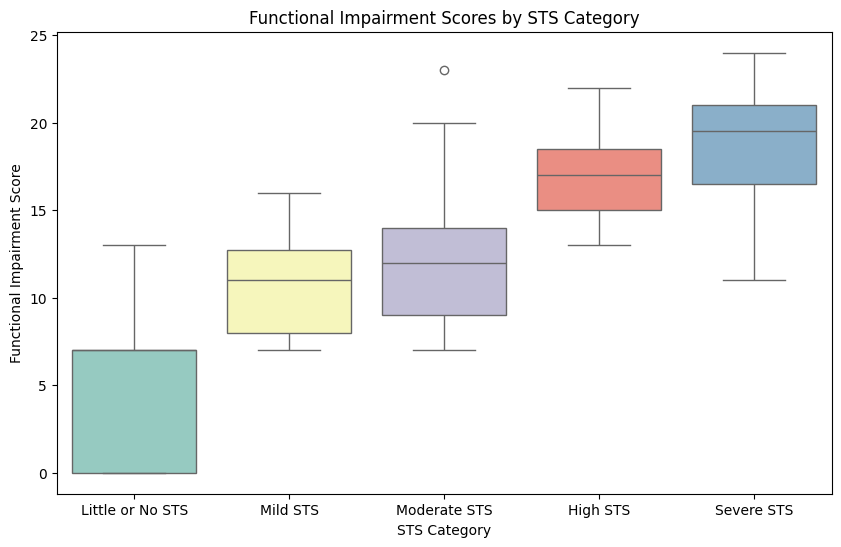

In [4]:
import polars as pl
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read and process the data
df = pl.read_csv("/content/no_sensitive_Secondary+Traumatic+Stress+and+its+Effects+on+Nurse+Faculty_February+1,+2022_16.37.csv")  # Replace with your file path
df = df.with_row_count('Participant_Number')

# Mapping for Q39 and Q41
q41_mapping = {"Never": 1, "Rarely": 2, "Occasionally": 3, "Often": 4, "Very Often": 5}
q39_mapping = {"None": 1, "A Little": 2, "Some": 3, "A Lot": 4, "A Great Deal": 5}

# Replace values with mappings
df = df.with_columns([
    pl.col(col).replace(q39_mapping, default=None).alias(col) for col in [f"Q39_{i}" for i in range(1, 8)]
])

df = df.with_columns([
    pl.col(col).replace(q41_mapping, default=None).alias(col) for col in [f"Q41_{i}" for i in range(1, 18)]
])

# Calculate STS
q41_columns = [f"Q41_{i}" for i in range(1, 18)]
df = df.with_columns(
    pl.sum_horizontal([pl.col(col) for col in q41_columns]).alias("STS")
)

# Categorize STS
def categorize_sts(sum_value):
    if sum_value <= 27:
        return "Little or No STS"
    elif 28 <= sum_value <= 37:
        return "Mild STS"
    elif 38 <= sum_value <= 43:
        return "Moderate STS"
    elif 44 <= sum_value <= 48:
        return "High STS"
    else:
        return "Severe STS"

df = df.with_columns(
    pl.col("STS").map_elements(categorize_sts).alias("STS_Category")
)

# Calculate Functional Impairment
q39_columns = [f"Q39_{i}" for i in range(1, 8)]
df = df.with_columns(
    pl.sum_horizontal([pl.col(col) for col in q39_columns]).alias("Functional Impairment")
)

# Convert to pandas DataFrame
df_pandas = df.to_pandas()

# Define the order of STS Categories
sts_order = ["Little or No STS", "Mild STS", "Moderate STS", "High STS", "Severe STS"]

# Create a summary table with average Functional Impairment scores
summary_table = df_pandas.groupby('STS_Category')['Functional Impairment'].mean().reindex(sts_order).reset_index()

# Display the summary table with formatting
summary_table_styled = summary_table.style.format({
    "Functional Impairment": "{:.2f}"
}).set_caption("Average Functional Impairment Scores by STS Category").set_table_styles([
    {"selector": "caption", "props": [("caption-side", "top"), ("font-size", "16px"), ("font-weight", "bold")]},
    {"selector": "th, td", "props": [("text-align", "left"), ("border", "2px solid black"), ("padding", "8px")]}
])

# Display the styled table (if you're in a notebook environment)
display(summary_table_styled)

# Create a boxplot with sorted STS Categories
plt.figure(figsize=(10, 6))
sns.boxplot(x='STS_Category', y='Functional Impairment', data=df_pandas, order=sts_order, palette="Set3")
plt.title('Functional Impairment Scores by STS Category')
plt.xlabel('STS Category')
plt.ylabel('Functional Impairment Score')
plt.show()

In [ ]:
df

Participant_Number,Q41_1,Q41_2,Q41_3,Q41_4,Q41_5,Q41_6,Q41_7,Q41_8,Q41_9,Q41_10,Q41_11,Q41_12,Q41_13,Q41_14,Q41_15,Q41_16,Q41_17,Q39_1,Q39_2,Q39_3,Q39_4,Q39_5,Q39_6,Q39_7,STS,STS_Category,Functional Impairment
u32,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,str,i64
0,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,0,"""Little or No S…",0
1,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,0,"""Little or No S…",0
2,3,3,3,3,2,2,2,3,3,4,3,2,1,3,3,2,2,2,2,2,1,2,2,2,44,"""High STS""",13
3,3,4,3,5,3,3,1,1,1,5,5,1,2,1,2,2,3,2,3,3,1,3,3,2,45,"""High STS""",17
4,1,1,1,1,1,1,1,1,1,1,1,1,1,3,2,1,1,1,1,1,1,1,1,1,20,"""Little or No S…",7
5,3,2,2,2,3,2,2,2,3,3,2,2,1,3,2,3,4,2,1,1,1,1,1,1,41,"""Moderate STS""",8
6,2,2,2,2,3,2,2,2,2,3,2,2,2,3,3,2,3,1,1,2,1,2,2,1,39,"""Moderate STS""",10
7,3,4,4,4,3,4,2,4,4,5,3,2,3,2,2,4,4,3,2,2,2,3,3,4,57,"""Severe STS""",19
8,3,1,2,1,1,2,1,1,1,3,3,1,1,2,1,1,2,1,1,2,1,1,2,1,27,"""Little or No S…",9
